# Coloring to preserve Computational Details:



In [1]:
import warnings
warnings.filterwarnings('ignore')

import time
import sys
import tempfile

import skimage.io as im_io

from PIL import TiffImagePlugin as tip
from PIL.TiffImagePlugin import Image

sys.path.insert(0, '../src/')
sys.path.insert(0, 'scalygraphic/src/')

from im_scale_products import *
from impute_color import *

In [4]:
print('Blah!')
import matplotlib.pyplot as pyplot

Blah!


# Compute
****
### Algebraic Vector Matrix Data: *EscapeTime, Z_initial, Z_final* (ET, Z0, Z)

In [2]:
results_dir = '../../results'
run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['theta'] = np.pi / 2
if os.path.isdir(run_parameters['dir_path']) == False:
    os.makedirs(run_parameters['dir_path'])
    
fcn_name = 'nlC3'
eq = EQUS_DICT[EQUS_DICT_NAMED_IDX[fcn_name]][1]
# generate parameters:
# p = eq(1, None)

p = [0.106699281931, -1.446300888486, 0.763588120232]
print('Using Equation parameters:\n',p,'\n')

list_tuple = [(eq, (p))]

t0 = time.time()
ET_1, Z_1, Z0_1 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0
print(tt, 's\ndata matrices size = ', ET_1.shape)

Using Equation parameters:
 [0.106699281931, -1.446300888486, 0.763588120232] 

1.2815589904785156 s
data matrices size =  (256, 256)


In [ ]:
2**16 - 1

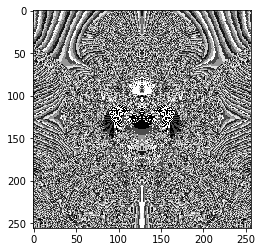

In [5]:
def pil_rgb_2_uint16_gray(rgb_im):
    """ convert a pillow rgb image to an unsigned 16 bit numpy array 
            - suitable for skimage.io.imsave
            - suitable for matplotlib color mapping
    
    Args:
        rgb_im:     PIL rgb image
        
    Returns:
        gray_int:   numpy.ndarray of uint16 (0, 65535)
    """
    rgb_im.getdata()
    r, g, b = rgb_im.split()
    
    ra = np.array(r)
    ga = np.array(g)
    ba = np.array(b)

    bit_depth = 2**16 - 1
    
    R2g = 0.299
    G2g = 0.587
    B2g = 0.114
        
    gray_int = np.uint16((R2g*ra + G2g*ga + B2g*ba) * bit_depth)
    
    return gray_int


img = get_im(ET_1, Z_1, Z0_1)
g_im = pil_rgb_2_uint16_gray(img)

pyplot.figure()
pyplot.imshow(g_im, cmap='gray')

<class 'numpy.ndarray'> (256, 256) 20125
type(read_im) <class 'numpy.ndarray'> (256, 256) 20125


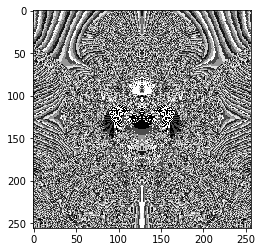

In [7]:
def get_uint16_gray(ET, Z, Z0):
    """  convert results data (ET, Z, Z0) to an unsigned 16 bit numpy array 
            - Write with: skimage.io.imsave(f_name, gray_int)
            - colo map with matplotlib.cm
    Args:
        ET:     (Integer) matrix of the Escape Times    
        Z:      (complex) matrix of the final vectors   
        Z0:     (complex) matrix of the starting plane

    Returns:
        gray_16bit:     numpy.ndarray (16 bit integer)
    """
    img = get_im(ET, Z, Z0)
    gray_int = pil_rgb_2_uint16_gray(img)
    
    return gray_int



gray_im = get_uint16_gray(ET_1, Z_1, Z0_1)
print(type(gray_im), gray_im.shape, len(list(set(gray_im.reshape(-1)))))

f_name = 'test_skim_io_16.tiff'
im_io.imsave(f_name, gray_im)

read_im = im_io.imread(f_name)
print('type(read_im)',type(read_im), read_im.shape, len(list(set(read_im.reshape(-1)))))
pyplot.figure()
pyplot.imshow(gray_im, cmap='gray')

```
<class 'numpy.ndarray'> (256, 256) 22301
type(read_im) <class 'numpy.ndarray'> (256, 256) 22301
```

In [ ]:
help(im_io.imsave)

In [8]:
os.listdir('../test/run_dir/results')

['3d79ae18ffa0ddaf4273ec00ab5dafed7634c77668e8fa745bee377c8071536d_large.jpg',
 '5057c10d41e2997fb9f3f691ab783f0d4419c21b918889cfaf4979f62b1ed258_large.jpg',
 'ae7a532b32069541d7245a5689c9b861ad88f6913ccf6012085bbca1903bac6b_large.jpg',
 '15bcf781b830d350bab90f3648ad985b3ca9461ceab650e7730581b4b9a236b3_small.jpg',
 'ef813e1703f8077bf5bda0c21ae3f1db0012325bfd5c674a0d5a8d0941d215cd_small.jpg',
 'ee68cef033068f22abf4c6725fe10deea9299f7754f02006291ffdb7c5be23b1_small.jpg',
 '15bcf781b830d350bab90f3648ad985b3ca9461ceab650e7730581b4b9a236b3_large.jpg',
 'ee68cef033068f22abf4c6725fe10deea9299f7754f02006291ffdb7c5be23b1_large.jpg',
 'ef813e1703f8077bf5bda0c21ae3f1db0012325bfd5c674a0d5a8d0941d215cd_large.jpg',
 'ae7a532b32069541d7245a5689c9b861ad88f6913ccf6012085bbca1903bac6b_small.jpg',
 '5057c10d41e2997fb9f3f691ab783f0d4419c21b918889cfaf4979f62b1ed258_small.jpg',
 '3d79ae18ffa0ddaf4273ec00ab5dafed7634c77668e8fa745bee377c8071536d_small.jpg',
 '17febfb0e1830a1e1604ed2db6cc854ca9f92301e018b1e8be

## Useful examples -- *impute_color.py* functions
****
### View the raw escape time & distance data in greyscle:
* Note that most of the data is not easy to see because the extremes hog the black or white.
* Enumerated, normalized version below shows all three imputed with an HSV scheme.
### Naive method: normalize all to graphic floats in range (0, 1)

In [ ]:
im = get_im(ET_1, Z_1, Z0_1)
display(im)

In [ ]:
# import numpy as np
# from PIL.Image import Image
# import matplotlib.pyplot as pyplot

img = im # Image.open("/Users/travis/Desktop/new_zealand.tif")

img.getdata()
r, g, b = img.split()

ra = np.array(r)
ga = np.array(g)
ba = np.array(b)

gray = (0.299*ra + 0.587*ga + 0.114*ba)

pyplot.figure()
pyplot.imshow(img)
pyplot.figure()
pyplot.imshow(gray)
pyplot.figure()
pyplot.imshow(gray, cmap="gray")


In [ ]:
A = gray.reshape(-1)
print('Number of unique gray levels = ',len(list(set(A))))

In [ ]:
gray[0,0]

In [ ]:
help(tifffile)

In [ ]:
help(tifffile.imwrite)

In [ ]:
# import tempfile
# import tiffflie

with tempfile.NamedTemporaryFile(suffix='.tif') as tifhandle:
    tifffile.imwrite(tifhandle, gray)
    gray_back = tifffile.imread(tifhandle.name)

In [ ]:
print(type(gray_back))
display(gray_back)

In [ ]:
help(tifffile.imread)

In [ ]:
from tifffile import TiffFile

In [ ]:
help(TiffFile)

In [ ]:
B16 = 2**16 - 1
R2g = 0.299
G2g = 0.587
B2g = 0.114
print(1 - (R2g + G2g + B2g))
A = np.uint16((R2g*Zd + G2g*Zr + B2g*ETn) * B16)

In [ ]:
B16 = 2**16 - 1
n_rows = np.shape(ET_1)[0]
n_cols = np.shape(ET_1)[1]
Zd, Zr, ETn = etg_norm(Z0_1, Z_1, ET_1)
A = np.uint16((R2g*Zd + G2g*Zr + B2g*ETn) * B16)
# A = np.zeros((n_rows, n_cols)).astype(np.uint16)
# A += (R2g*Zd + G2g*Zr + B2g*ETn) * B16
print('A.shape', A.shape, len(list(set(A.reshape(-1)))))
pyplot.figure()
pyplot.imshow(A)

In [ ]:
nrm_prd = Zd * Zr * ETn
nrm_prd = nrm_prd - nrm_prd.min()
nrm_prd = nrm_prd / nrm_prd.max()
nrm_prd = nrm_prd * B16
nrm_prd = np.uint16(nrm_prd)
pyplot.figure()
pyplot.imshow(nrm_prd)

In [ ]:
#  Zd * Zr * ETn
p = np.uint16((Zd * Zr * ETn) * B16)
print(B16, len(list(set(nrm_prd.reshape(-1)))))
print('Zd ', len(list(set(Zd.reshape(-1)))))
print('Zr ', len(list(set(Zd.reshape(-1)))))
print('ETn', len(list(set(ETn.reshape(-1)))))
print('p', len(list(set(p.reshape(-1)))), p.max())

In [ ]:
f_name = 'test_me_tif_skimio.tiff'
print(B.shape, p.shape)
im_io.imsave(f_name, p)
# with open(f_name, 'wf') as tifhandle:
#     im_io.imsave(tifhandle, p)
if os.path.isfile(f_name):
    print('found:',f_name)

P_im = im_io.imread(f_name)
pyplot.figure()
pyplot.imshow(P_im)

In [ ]:
help(im_io.imsave)

In [ ]:
f_name = 'test_me_tif_p.tiff'
with open(f_name, 'wb') as tifhandle:
    tifffile.imwrite(tifhandle, B)
if os.path.isfile(f_name):
    print('found:',f_name)

P_im = im_io.imread(f_name)
pyplot.figure()
pyplot.imshow(P_im)

In [ ]:
c_mp = mpl.cm.get_cmap('gray')
B = c_mp(p)
pyplot.figure()
pyplot.imshow(B)

In [ ]:
f_name = 'test_me_tif.tiff'
with open(f_name, 'wb') as tifhandle:
    tifffile.imwrite(tifhandle, B)
if os.path.isfile(f_name):
    print('found:',f_name)

In [ ]:
C = tifffile.imread(f_name)
print(type(C))
pyplot.figure()
pyplot.imshow(C)

In [ ]:
print('C', C.shape, len(list(set(C.reshape(-1)))), C.max(), C.min())

In [ ]:
# def gray_16_tiff()

In [ ]:
# A = np.zeros((n_rows, n_cols, 3))
# A[:,:,0] += ETn     # Hue
# A[:,:,1] += Zr      # Saturation
# A[:,:,2] += Zd      # Value

In [ ]:
# complex result vectors == final minus initial
Z_vec = Z_1 - Z0_1

#                             normaize all to (0, 1)
# number of iterations
ET_n1 = graphic_norm(ET_1)
g_im_et = primitive_2_gray(ET_n1)
# complex result vectors: distance component
Zd_n1 = np.abs(Z_vec)
Zd_n1 = graphic_norm(Zd_n1)
g_im_Zd = primitive_2_gray(Zd_n1)

# complex result vectors: rotation component
Zr_n1 = np.arctan2(np.imag(Z_vec), np.real(Z_vec))
Zr_n1 = graphic_norm(Zr_n1)
g_im_Zr = primitive_2_gray(Zr_n1)

n_rows = np.shape(ET_1)[0]
n_cols = np.shape(ET_1)[1]

im_list = [g_im_et,g_im_Zd,g_im_Zr]
# new_im = cat_im_list_hori(im_list)
new_im = cat_im_list_verti(im_list)
print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

### Problems with the Naive method:
    * Extremes pixel values mask the details in the softer regions


In [ ]:
Zd_n2, Zr_n2, ETn_n2 = etg_norm(Z0_1, Z_1, ET_1)

g_im_et = primitive_2_gray(ETn_n2)
# complex result vectors: distance component
g_im_Zd = primitive_2_gray(Zd_n2)

# complex result vectors: rotation component
g_im_Zr = primitive_2_gray(Zr_n2)

im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)
#new_im = cat_im_list_verti(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

### Much better visibility for the distance channel 


### Compositing all three makes a smooter image

In [ ]:
im_gray = get_gray_im(ET_1, Z_1, Z0_1)
display(im_gray)

In [ ]:
gray_array = np.array(im_gray)

g = gray_array.reshape(-1)
len(list(set(g)))

```python
import scipy.misc
img = scipy.misc.toimage(Zd_n2, mode='L')
display(img)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-26-e887f228efaf> in <module>
      1 import scipy.misc
----> 2 img = scipy.misc.toimage(Zd_n2, mode='L')
      3 display(img)

AttributeError: module 'scipy.misc' has no attribute 'toimage'

```

In [ ]:
n_rows = np.shape(ET_1)[0]
n_cols = np.shape(ET_1)[1]
Zd, Zr, ETn = etg_norm(Z0_1, Z_1, ET_1)

A = np.zeros((n_rows, n_cols, 3))
A[:,:,0] += ETn     # Hue
A[:,:,1] += Zr      # Saturation
A[:,:,2] += Zd      # Value

I = tip.Image.fromarray(np.uint8(A*255), 'HSV').convert('RGB')
# display(I)
# print(A.shape, type(A))
fname = 'test.tiff'
im_io.imsave(fname, A, plugin='tifffile')
if os.path.isfile(fname):
    print(fname, 'found')
# with tempfile.NamedTemporaryFile(suffix='.tiff') as tmp:
#     print(type(tmp), tmp, tmp.name)
#     print(os.path.isfile(tmp.name))
#     im_io.imsave(tmp.name, A)
#     #np.save(tmp, A)
#     #im_io.imsave(tmp.name, A)
#     #B = im_io.imread(tmp.name) #, as_gray=True)
#     #B2 = tip.Image.open(tmp.name)
#     #B2 = PIM.open(tmp.name)
#     B = im_io.imread(tmp.name)
    
# print(os.path.isfile(tmp.name))

# print(B.shape, type(B), type(B[0,0,0]))
# B_img = tip.Image.fromarray(B, 'HSV').convert('RGB')

# print('\n',type(B_img), B_img.size)
# display(B_img)
# display(I)

In [ ]:
help(ipd)

In [ ]:

g_im_et = primitive_2_gray(ET_1)
g_im_Zd = primitive_2_gray(np.abs(Z_1 - Z0_1))
Zv = Z_1 - Z0_1
Zv = np.arctan2(np.imag(Zv), np.real(Zv))
g_im_Zr = primitive_2_gray(Zv)


im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

In [ ]:
Zv = Z_1 - Z0_1

ET_f, n_colors = flat_index(ET_1)
g_im_et = primitive_2_gray(ET_f)

Zv_f, n_colors = flat_index(np.abs(Zv))
g_im_Zd = primitive_2_gray(Zv_f)


Zr = np.arctan2(np.imag(Zv), np.real(Zv))
Zr_f, n_colors = flat_index(Zr)
g_im_Zr = primitive_2_gray(Zr_f)


im_list = [g_im_et,g_im_Zd,g_im_Zr]
new_im = cat_im_list_hori(im_list)

print('%15s%30s%30s'%('ET','Zd','Zr'))
display(new_im)

In [ ]:
im = map_raw_etg(Z0_1, Z_1, ET_1, c_map_name='gist_gray')
display(im)

In [ ]:
im = get_gray_im(ET_1, Z_1, Z0_1)
display(im)

In [ ]:
show_color_maps()

In [ ]:
print('%s\n%s\n%s'%('ET','Zd','Zr'))
new_im = cat_im_list_verti(im_list)
display(new_im)

In [ ]:
g_im_et = primitive_2_gray(ET_1)

display(g_im_et)

In [ ]:
g_im_Zd = primitive_2_gray(np.abs(Z_1 - Z0_1))
display(g_im_Zd)

In [ ]:
# Zd_1, Zr_1, ETn_1 = etg_norm(Z0_1, Z_1, ET_1)
Zv = np.abs(Z_1 - Z0_1)
Zv = np.arctan2(np.imag(Zv), np.real(Zv))
g_im_Zr = primitive_2_gray(Zv)
# g_im = tip.Image.fromarray(Zv, 'L', colors=2**16-1)

display(g_im_Zr)

### View all results as an HSV (converted to RGB for display)
```python
# normalized enumeration of Z-Z0 distance, rotation (Zd, Zr) and Escape Time
Zd, Zr, ETn = etg_norm(Z0, Z, ET)

A = np.zeros((n_rows, n_cols,3))
A[:,:,0] += ETn     # Hue
A[:,:,1] += Zr      # Saturation
A[:,:,2] += Zd      # Value
```

In [ ]:
im = get_im(ET_1, Z_1, Z0_1)
display(im)

## Re-Compute
* *theta* rotates the domain before calculation
* Rotate to view symmetry with the broad part at the bottom - humans like that

In [ ]:
#                          Rotate the image for human readability:

run_parameters = get_default_run_parameters(results_dir=None)
run_parameters['theta'] = np.pi / 2

t0 = time.time()
ET, Z, Z0 = eq_iter.get_primitives(list_tuple, run_parameters)
tt = time.time() - t0

print(tt, 's\ndata matrices size = ', ET.shape)

## View The Rotated Data with different color assignments

In [ ]:
#                     HSV to RGB composite
im = get_im(ET, Z, Z0)
display(im)

In [ ]:
#                     HSV to RGB composite to Greyscale
im = get_gray_im(ET, Z, Z0)
display(im)

## Color map assignment to where greyscale is used as index to map
(choose color map from the list)

In [ ]:
show_color_maps(6)

In [ ]:
#                     HSV to RGB composite to Greyscale as index to colormap
do_im = map_etg_composite(Z0, Z, ET, c_map_name='afmhot')
display(do_im)

In [ ]:
do_im = map_etg_composite(Z0, Z, ET, c_map_name='gray')
display(do_im)

In [ ]:
do_im = map_etg_composite(Z0, Z, ET, c_map_name='nipy_spectral')
display(do_im)

In [ ]:
do_im = map_etg_composite(Z0, Z, ET, c_map_name='jet')
display(do_im)